In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

table_base = pd.read_csv("2017_jun_final.csv")

df = table_base

print(df.head())

   N                    Посада Мова програмування Спеціалізація  \
0  1        Junior QA engineer                NaN     Manual QA   
1  2        Junior QA engineer                NaN     Manual QA   
2  3         Software Engineer            C#/.NET           NaN   
3  4         Software Engineer         JavaScript           NaN   
4  5  Senior Software Engineer         JavaScript           NaN   

  Загальний досвід роботи Досвід роботи на поточному місці  \
0                     0.5                              0.5   
1         менше 3 місяців                  менше 3 місяців   
2                       4                                1   
3                       5                                4   
4       10 і більше років                              0.5   

   Зарплата на місяць  Зміна зарплати за 12 місяців   Місто   Розмір компанії  \
0                 400                             0  Харків        до 10 осіб   
1                 430                           130  Харків  б

In [30]:
num_rows, num_cols = df.shape
print(f"\nКоличество строк: {num_rows}")
print(f"Количество столбцов: {num_cols}")

column_types = df.dtypes
print(column_types)




Количество строк: 8704
Количество столбцов: 25
N                                     int64
Посада                               object
Мова програмування                   object
Спеціалізація                        object
Загальний досвід роботи              object
Досвід роботи на поточному місці     object
Зарплата на місяць                    int64
Зміна зарплати за 12 місяців          int64
Місто                                object
Розмір компанії                      object
Тип компанії                         object
Стать                                object
Вік                                   int64
Освіта                               object
Університет                          object
Ще студент                             bool
Рівень англійської                   object
Предметна область                    object
Дата заповнення                      object
User.Agent                           object
exp                                 float64
current_job_exp             

In [31]:
missing_counts = df.isnull().sum()
missing = (missing_counts / len(df)) * 100

print(f"Частка пропусків: {missing}")

Частка пропусків: N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Спеціалізація                       82.938879
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Університет                          4.113051
Ще студент                           0.000000
Рівень англійської                   0.000000
Предметна область                    2.562040
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp 

Частка пропусків: N                                    0.000000
Посада                               0.000000
Мова програмування                  44.232537
Загальний досвід роботи              0.000000
Досвід роботи на поточному місці     0.000000
Зарплата на місяць                   0.000000
Зміна зарплати за 12 місяців         0.000000
Місто                                0.000000
Розмір компанії                      0.000000
Тип компанії                         0.000000
Стать                                0.000000
Вік                                  0.000000
Освіта                               0.000000
Ще студент                           0.000000
Рівень англійської                   0.000000
Дата заповнення                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                      0.000000
salary                               0.000000
dtype: float64


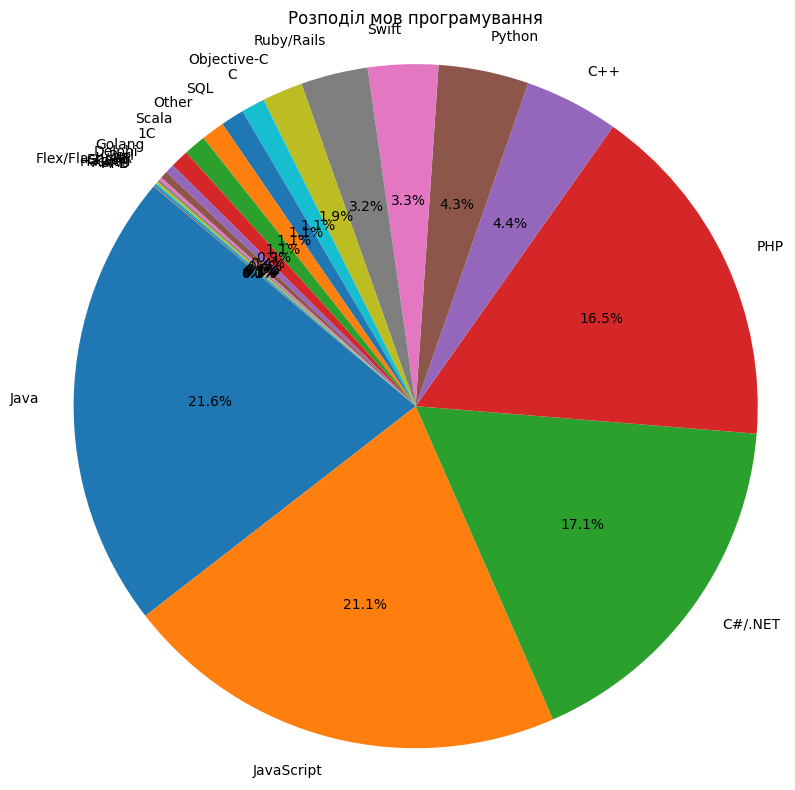

In [46]:
base_column = df['Мова програмування']
df= df.dropna(axis=1)
df.insert(2, 'Мова програмування', base_column)
missing_counts = df.isnull().sum()
missing = (missing_counts / len(df)) * 100

print(f"Частка пропусків: {missing}")

language_counts = df['Мова програмування'].value_counts()
labels = language_counts.index
sizes = language_counts.values

# Побудова кругової діаграми
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл мов програмування')
plt.axis('equal')  # Забезпечення круглої форми діаграми
plt.tight_layout()
plt.show()

In [33]:
df = table_base
df = df.dropna()
num_rows, num_cols = df.shape
print(f"\nКоличество строк: {num_rows}")
print(f"Количество столбцов: {num_cols}")



Количество строк: 0
Количество столбцов: 25


In [34]:
df = table_base
python_data = table_base[table_base['Мова програмування'] == 'Python']
num_rows, num_cols = python_data.shape
print(f"\nКоличество строк: {num_rows}")
print(f"Количество столбцов: {num_cols}")


Количество строк: 207
Количество столбцов: 25


                         Зарплата на місяць      
                                        min   max
Посада                                           
Junior Software Engineer                100  1250
Senior Software Engineer               1300  9200
Software Engineer                       500  5400
System Architect                       3000  5000
Technical Lead                         1425  6200


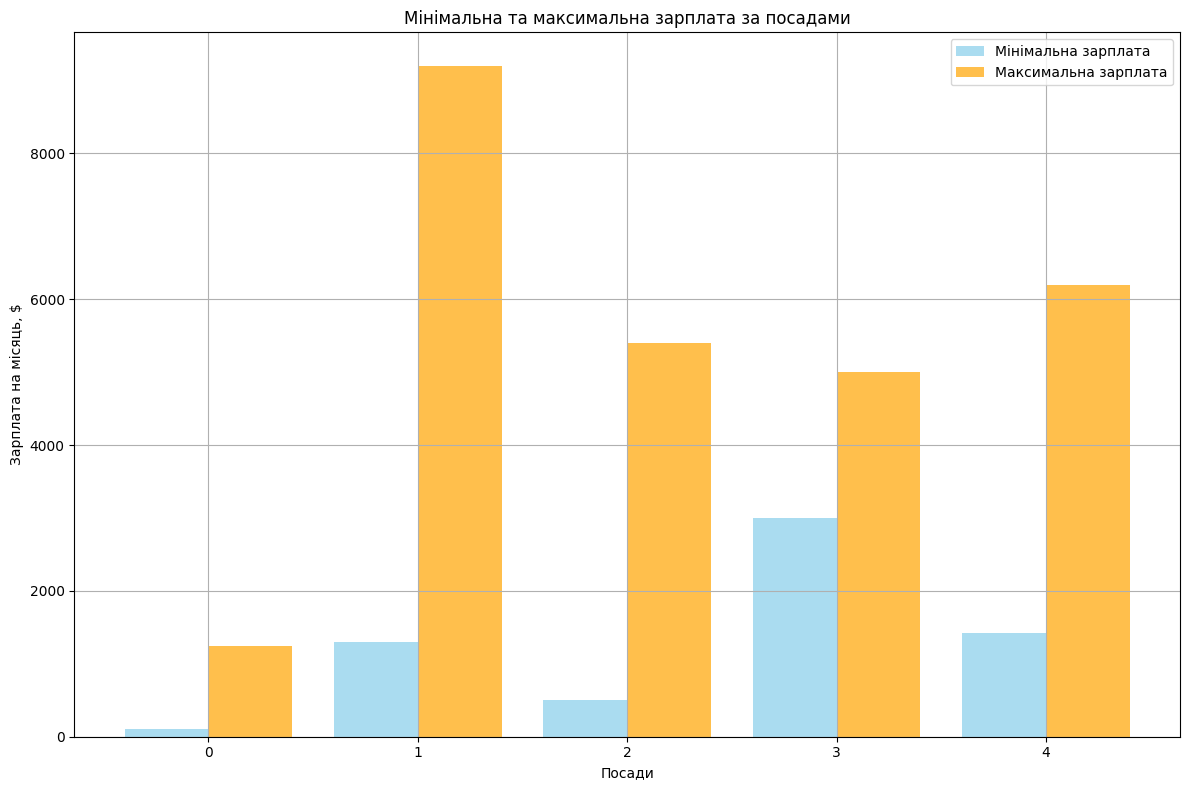

In [49]:
grouped= python_data.groupby('Посада')
aggregated_data = grouped.agg({'Зарплата на місяць': ['min', 'max']})
print(aggregated_data)

positions = aggregated_data.index
min_salaries = aggregated_data[('Зарплата на місяць', 'min')]
max_salaries = aggregated_data[('Зарплата на місяць', 'max')]

# Побудова стовпчикової діаграми
positions = range(len(positions))  # Позиції для стовпчиків
width = 0.4  # Ширина кожного стовпчика

# Побудова стовпчикової діаграми
plt.figure(figsize=(12, 8))
plt.bar(positions, min_salaries, width=width, color='skyblue', alpha=0.7, label='Мінімальна зарплата')
plt.bar([pos + width for pos in positions], max_salaries, width=width, color='orange', alpha=0.7, label='Максимальна зарплата')
plt.title('Мінімальна та максимальна зарплата за посадами')
plt.xlabel('Посади')
plt.ylabel('Зарплата на місяць, $')
plt.xticks([pos + width/2 for pos in positions], positions)  # Розміщення підписів осі X
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<bound method NDFrame.head of          N                    Посада Мова програмування Спеціалізація  \
12      13         Software Engineer             Python           NaN   
68      69         Software Engineer             Python           NaN   
87      88  Junior Software Engineer             Python           NaN   
114    115  Junior Software Engineer             Python           NaN   
143    144  Junior Software Engineer             Python           NaN   
...    ...                       ...                ...           ...   
8546  8547         Software Engineer             Python           NaN   
8625  8626         Software Engineer             Python           NaN   
8635  8636  Senior Software Engineer             Python           NaN   
8673  8674  Junior Software Engineer             Python           NaN   
8695  8696         Software Engineer             Python           NaN   

     Загальний досвід роботи Досвід роботи на поточному місці  \
12                         1

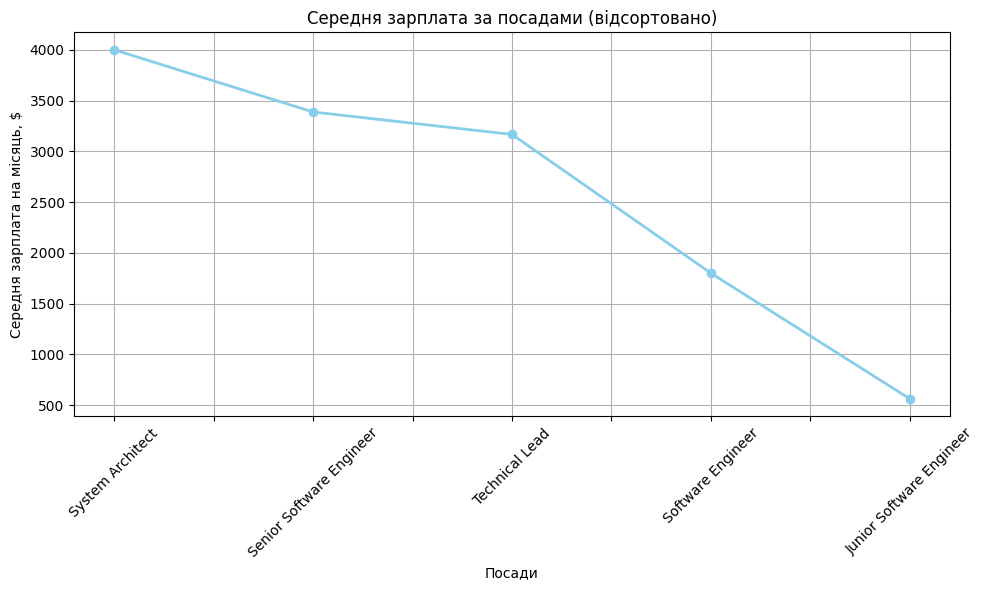

In [48]:
avg = grouped['Зарплата на місяць'].mean()
def fill_avg_salary(row):
    return avg[row['Посада']]
python_data.loc[:, 'avg'] = python_data.apply(fill_avg_salary, axis=1)


print(python_data.head)


sorted_avg = avg.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sorted_avg.plot(kind='line', marker='o', color='skyblue', linestyle='-', linewidth=2)
plt.title('Середня зарплата за посадами (відсортовано)')
plt.xlabel('Посади')
plt.ylabel('Середня зарплата на місяць, $')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
avg_stats = python_data['avg'].describe()
print("Описова статистика для стовпчика 'avg':")
print(avg_stats)

Описова статистика для стовпчика 'avg':
count     207.000000
mean     1753.937198
std       996.562606
min       560.841270
25%       560.841270
50%      1799.070000
75%      1799.070000
max      4000.000000
Name: avg, dtype: float64


In [38]:
python_data.to_csv('python_data.csv', index=False)
print("Таблицю збережено у файлі 'python_data.csv'")

Таблицю збережено у файлі 'python_data.csv'
